# Olivetti con clasificadores generativos

In [2]:
from sklearn.datasets import fetch_olivetti_faces
orl = fetch_olivetti_faces()
X = orl.data
y = orl.target

**Representación de la cara obtenida como valor medio de cada pixel**

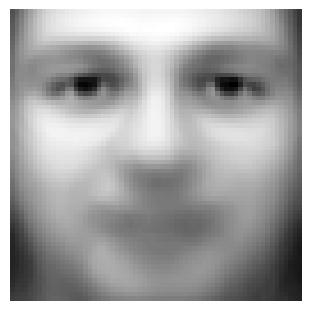

In [3]:
import numpy as np
import matplotlib.pyplot as plt
m = np.mean(X,axis=0)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3), constrained_layout=True);
ax.set_axis_off()
ax.imshow(m.reshape(64,64), cmap=plt.cm.gray, interpolation="none")

**Representación de la cara obtenida como valor medio de cada pixel para cada cara (clase)**

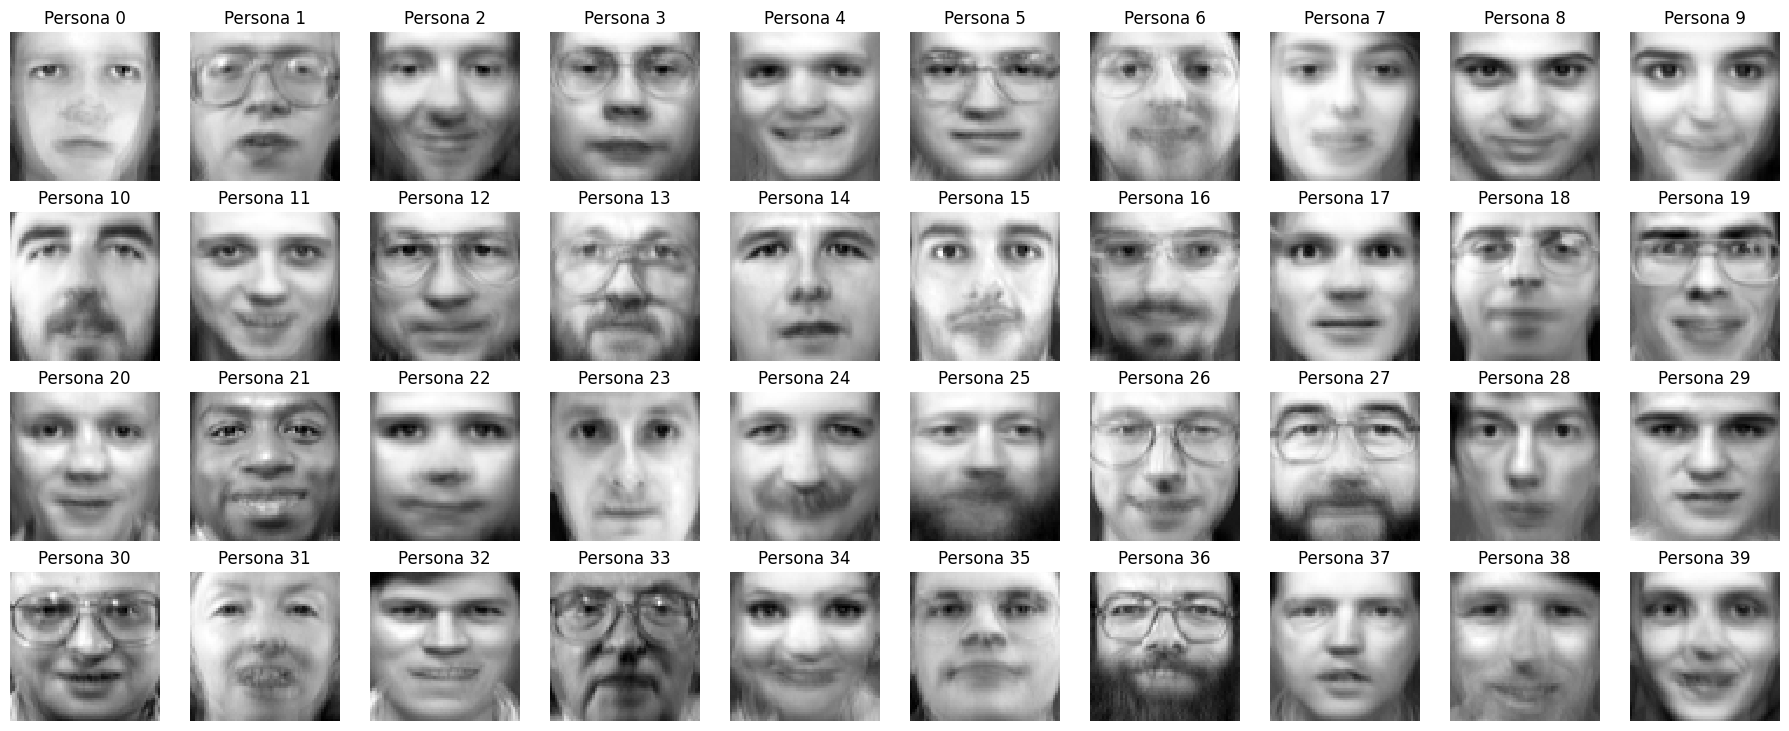

In [4]:
nrows, ncols = 4, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 40):
  ax = axes.flat[c]
  ax.set_axis_off()
  face = np.where(y==c)
  m = np.mean(X[face], axis=0)
  ax.imshow(m.reshape(64,64), cmap=plt.cm.gray, interpolation="none")
  ax.set_title("Persona {:}".format(c))



**Medias de las Gaussianas aprendidas con un clasificador Quadratic Discriminant Analysis (QDA)**


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


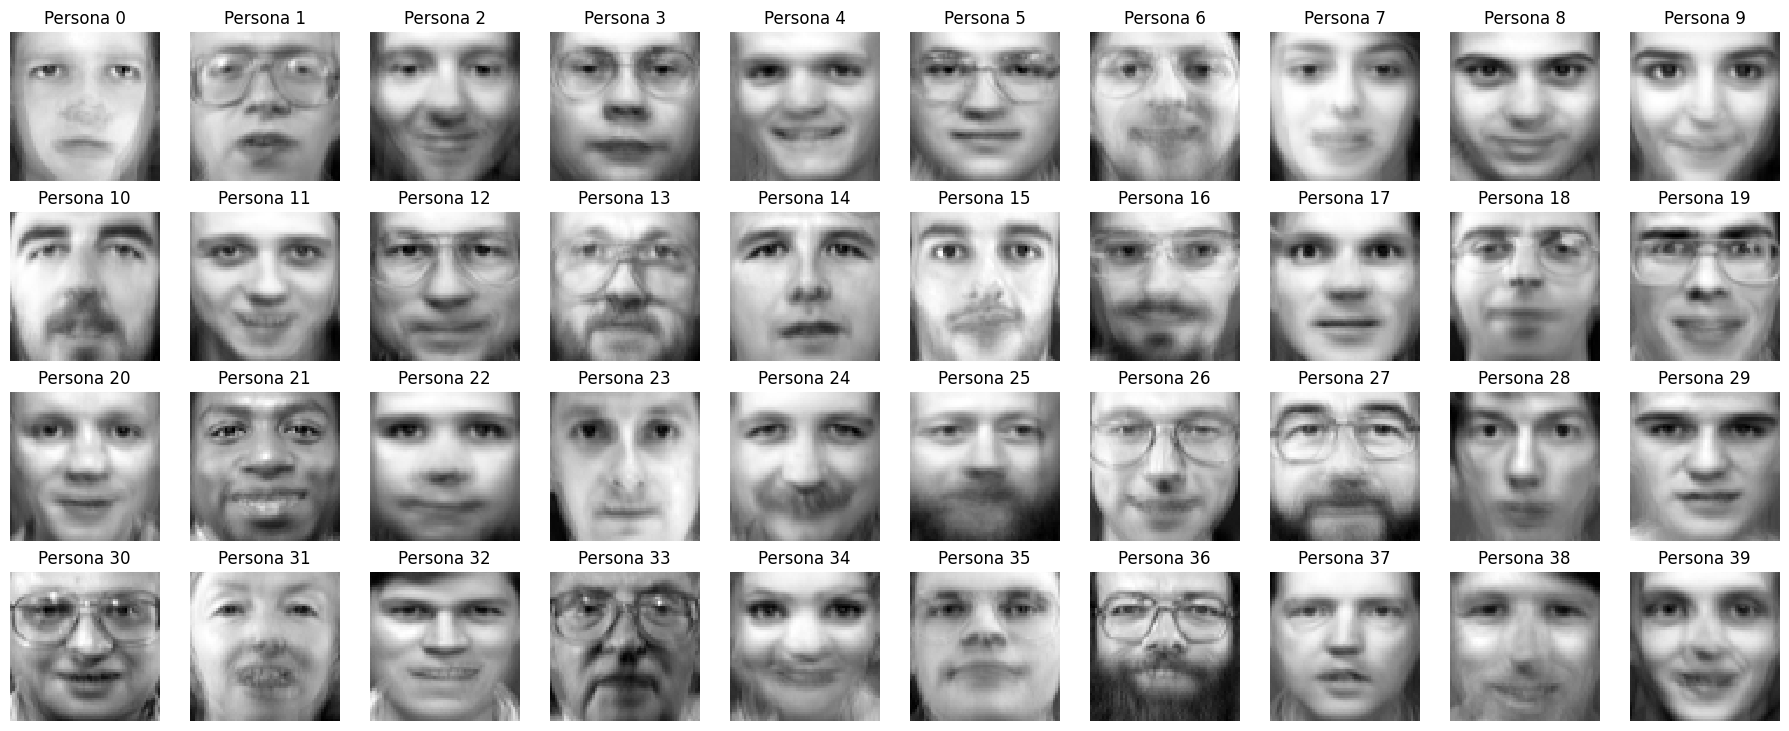

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)
nrows, ncols = 4, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 40):
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(clf.means_[c].reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("Persona {:}".format(c))

**Generación aleatoria de una cara para las 10 primeras personas del corpus usando QDA**

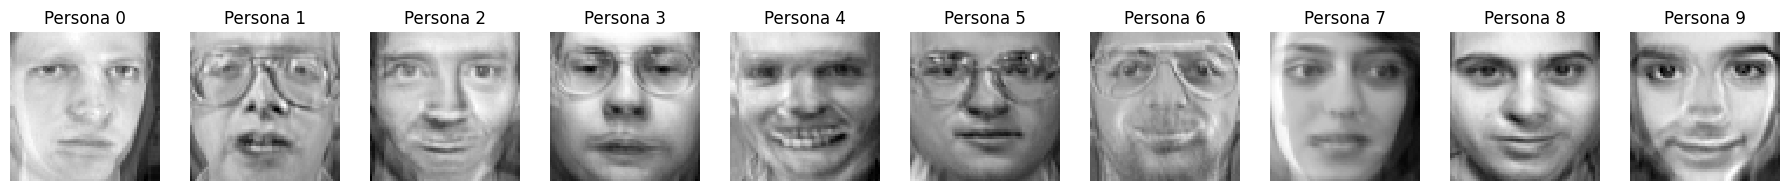

In [6]:
nrows, ncols = 1, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 10):
  ax = axes.flat[c]
  ax.set_axis_off()
  random_face=np.random.multivariate_normal(clf.means_[c], clf.covariance_[c], size=None, check_valid='ignore', tol=1e-8)
  ax.imshow(random_face.reshape(64,64), cmap=plt.cm.gray, interpolation="none")
  ax.set_title("Persona {:}".format(c))